In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
from sklearn.model_selection import train_test_split

from gptchem.data import get_polymer_data
from gptchem.evaluator import PolymerKLDivBenchmark, polymer_string2performance, string_distances, get_inverse_polymer_metrics
from gptchem.formatter import InverseDesignFormatter

from gptchem.plotsettings import *

In [28]:
data = get_polymer_data()

In [57]:
from rdkit import Chem
import pandas as pd
formatter = InverseDesignFormatter(
    representation_column="string",
    property_columns=["deltaGmin"],
    property_names=["adsorption_energy"],
   # num_classes=5
)

In [69]:
data

,Unnamed: 0,smiles,string,deltaGmin,A2_normalized,deltaGmin_cat,A2_normalized_cat,num_[W],max_[W],num_[Tr],...,[W],[W].1,[Tr],[Tr].1,[Ta],[Ta].1,[R],[R].1,rel_shannon,length
0,0,[W][Ta][Tr][W][W][Ta][Ta][Ta][R][W][Tr][Tr][R]...,W-A-B-W-W-A-A-A-R-W-B-B-R-R-B-R,-7.535286,-0.109726,very large,very small,0.250000,2,0.250000,...,4.0,0.25,4.0,0.25,4.0,0.25,4.0,0.25,0.500000,16
1,1,[R][W][W][R][R][Tr][Tr][Tr][Ta][Ta][Ta][W][W][...,R-W-W-R-R-B-B-B-A-A-A-W-W-A-R-B,-7.270527,0.580595,very large,very large,0.400000,2,0.200000,...,4.0,0.25,4.0,0.25,4.0,0.25,4.0,0.25,0.500000,16
2,2,[Ta][R][Ta][W][Tr][W][Ta][R][Tr][W][Ta][Tr][Tr...,A-R-A-W-B-W-A-R-B-W-A-B-B-R-W-R,-6.416311,0.956320,very large,very large,0.000000,0,1.000000,...,4.0,0.25,4.0,0.25,4.0,0.25,4.0,0.25,0.500000,16
3,3,[W][Ta][R][Ta][Tr][Tr][Tr][W][Ta][W][Tr][R][Ta...,W-A-R-A-B-B-B-W-A-W-B-R-A-W-R-R,-6.684816,1.129924,very large,very large,0.000000,0,0.500000,...,4.0,0.25,4.0,0.25,4.0,0.25,4.0,0.25,0.500000,16
4,4,[R][R][Tr][Tr][W][R][Ta][W][R][W][Ta][Tr][Ta][...,R-R-B-B-W-R-A-W-R-W-A-B-A-A-W-B,-6.606492,-0.496439,very large,very small,0.000000,0,0.333333,...,4.0,0.25,4.0,0.25,4.0,0.25,4.0,0.25,0.500000,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3120,3120,[R][W][Tr][W][W][Tr][Tr][Tr][Ta][W][W][W][Ta][...,R-W-B-W-W-B-B-B-A-W-W-W-A-W-A-A-W-A-R-R-B-B-A-...,-16.952768,0.091738,very small,medium,0.181818,3,0.181818,...,12.0,0.25,12.0,0.25,12.0,0.25,12.0,0.25,0.358104,48
3121,3121,[R][Ta][Ta][R][Ta][R][W][Tr][W][Ta][R][Tr][W][...,R-A-A-R-A-R-W-B-W-A-R-B-W-R-B-R-W-B-A-B-A-B-A-...,-17.129209,0.168408,very small,large,0.285714,3,0.142857,...,12.0,0.25,12.0,0.25,12.0,0.25,12.0,0.25,0.358104,48
3122,3122,[W][W][R][Tr][W][W][Ta][W][R][R][Ta][R][Tr][Ta...,W-W-R-B-W-W-A-W-R-R-A-R-B-A-A-W-R-R-B-B-B-A-R-...,-16.361276,-0.068601,very small,very small,0.222222,2,0.222222,...,12.0,0.25,12.0,0.25,12.0,0.25,12.0,0.25,0.358104,48
3123,3123,[Tr][Ta][Tr][Tr][R][W][Ta][R][W][R][Tr][W][R][...,B-A-B-B-R-W-A-R-W-R-B-W-R-W-R-R-W-B-W-A-A-B-A-...,-14.729411,0.000645,small,small,0.111111,2,0.333333,...,12.0,0.25,12.0,0.25,12.0,0.25,12.0,0.25,0.358104,48


In [58]:
formatted = formatter(data)

In [59]:
formatted

,prompt,completion,label,representation
0,What is a molecule with adsorption_energy -7.5...,W-A-B-W-W-A-A-A-R-W-B-B-R-R-B-R@@@,W-A-B-W-W-A-A-A-R-W-B-B-R-R-B-R,[-7.535286244444447]
1,What is a molecule with adsorption_energy -7.3...,R-W-W-R-R-B-B-B-A-A-A-W-W-A-R-B@@@,R-W-W-R-R-B-B-B-A-A-A-W-W-A-R-B,[-7.270527222222221]
2,What is a molecule with adsorption_energy -6.4...,A-R-A-W-B-W-A-R-B-W-A-B-B-R-W-R@@@,A-R-A-W-B-W-A-R-B-W-A-B-B-R-W-R,[-6.416311311111111]
3,What is a molecule with adsorption_energy -6.7...,W-A-R-A-B-B-B-W-A-W-B-R-A-W-R-R@@@,W-A-R-A-B-B-B-W-A-W-B-R-A-W-R-R,[-6.684815644444439]
4,What is a molecule with adsorption_energy -6.6...,R-R-B-B-W-R-A-W-R-W-A-B-A-A-W-B@@@,R-R-B-B-W-R-A-W-R-W-A-B-A-A-W-B,[-6.606492355555552]
...,...,...,...,...
3120,What is a molecule with adsorption_energy -17....,R-W-B-W-W-B-B-B-A-W-W-W-A-W-A-A-W-A-R-R-B-B-A...,R-W-B-W-W-B-B-B-A-W-W-W-A-W-A-A-W-A-R-R-B-B-A-...,[-16.95276779999999]
3121,What is a molecule with adsorption_energy -17....,R-A-A-R-A-R-W-B-W-A-R-B-W-R-B-R-W-B-A-B-A-B-A...,R-A-A-R-A-R-W-B-W-A-R-B-W-R-B-R-W-B-A-B-A-B-A-...,[-17.129209466666673]
3122,What is a molecule with adsorption_energy -16....,W-W-R-B-W-W-A-W-R-R-A-R-B-A-A-W-R-R-B-B-B-A-R...,W-W-R-B-W-W-A-W-R-R-A-R-B-A-A-W-R-R-B-B-B-A-R-...,[-16.361275533333345]
3123,What is a molecule with adsorption_energy -14....,B-A-B-B-R-W-A-R-W-R-B-W-R-W-R-R-W-B-W-A-A-B-A...,B-A-B-B-R-W-A-R-W-R-B-W-R-W-R-R-W-B-W-A-A-B-A-...,[-14.72941055555556]


In [60]:
polymer_string2performance(formatted.iloc[0]["label"])

{'monomer_squence': 'W-A-B-W-W-A-A-A-R-W-B-B-R-R-B-R',
 'composition': {'W': 4, 'A': 4, 'B': 4, 'R': 4},
 'smiles': '[W][Ta][Tr][W][W][Ta][Ta][Ta][R][W][Tr][Tr][R][R][Tr][R]',
 'prediction': array([-6.1970377], dtype=float32),
 'features':    head_tail_[W]  head_tail_[Tr]  head_tail_[Ta]  head_tail_[R]  \
 0              1               0               0              1   
 
    total_clusters  num_[W]  max_[W]  min_[W]  mean_[W]  num_[Tr]  ...   [W]  \
 0               4     0.25        2        2       2.0      0.25  ...  0.25   
 
    [Tr]  [Ta]   [R]  rel_shannon  length  total_solvent  std_solvent  \
 0  0.25  0.25  0.25          0.5      16            480     3.535534   
 
    total_surface  std_surface  
 0            400          5.0  
 
 [1 rows x 31 columns]}

In [63]:
predictions = []
for i, row in data.iterrows():
    predictions.append(polymer_string2performance(row["string"])['prediction'][0])

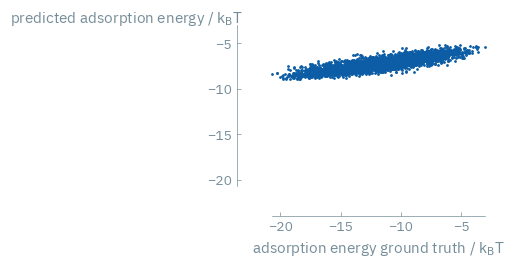

In [68]:
fig, ax = plt.subplots()

ax.scatter(data["deltaGmin"], predictions, s=1)

ax.set_xlabel("adsorption energy ground truth / k$_\mathrm{B}$T")
ylabel_top("predicted adsorption energy / k$_\mathrm{B}$T")

range_frame(
    ax, 
    np.stack([data["deltaGmin"], predictions]).flatten(),
    np.stack([data["deltaGmin"], predictions]).flatten(),
)

In [8]:
kldiv_benchmark = PolymerKLDivBenchmark(formatted.iloc[80:]['label'], 20)

In [10]:
string_distances(formatted.iloc[0:10]["label"], formatted.iloc[1]["label"])

{'Levenshtein_min': 0.0,
 'Levenshtein_max': 18.0,
 'Levenshtein_mean': 12.4,
 'Levenshtein_std': 4.543126676640219,
 'NormalizedLevenshtein_min': 0.0,
 'NormalizedLevenshtein_max': 0.5142857142857142,
 'NormalizedLevenshtein_mean': 0.3734562211981567,
 'NormalizedLevenshtein_std': 0.13521010617991372,
 'LongestCommonSubsequence_min': 0.0,
 'LongestCommonSubsequence_max': 26.0,
 'LongestCommonSubsequence_mean': 19.6,
 'LongestCommonSubsequence_std': 6.916646586316233}

In [17]:
metrics = get_inverse_polymer_metrics(
    formatted.iloc[0:50]["label"] + "rfer",
    df_test=formatted.iloc[50:100],
    df_train=formatted.iloc[100:200],
)

W-A-B-W-W-A-A-A-R-W-B-B-R-R-B-Rrfer {'R': 0, 'W': 0, 'A': 0, 'B': 0}
R-W-W-R-R-B-B-B-A-A-A-W-W-A-R-Brfer {'R': 0, 'W': 0, 'A': 0, 'B': 0}
A-R-A-W-B-W-A-R-B-W-A-B-B-R-W-Rrfer {'R': 0, 'W': 0, 'A': 0, 'B': 0}
W-A-R-A-B-B-B-W-A-W-B-R-A-W-R-Rrfer {'R': 0, 'W': 0, 'A': 0, 'B': 0}
R-R-B-B-W-R-A-W-R-W-A-B-A-A-W-Brfer {'R': 0, 'W': 0, 'A': 0, 'B': 0}
W-B-B-A-W-A-W-W-A-R-W-R-B-R-W-B-A-Rrfer {'R': 0, 'W': 0, 'A': 0, 'B': 0}
W-W-B-W-R-B-R-A-W-B-A-A-W-R-W-B-A-Rrfer {'R': 0, 'W': 0, 'A': 0, 'B': 0}
B-B-A-B-A-W-R-W-R-W-B-R-W-A-W-W-A-Rrfer {'R': 0, 'W': 0, 'A': 0, 'B': 0}
R-W-R-A-R-A-B-W-W-W-B-B-W-W-A-B-A-Rrfer {'R': 0, 'W': 0, 'A': 0, 'B': 0}
B-B-W-W-B-W-R-A-A-B-A-W-A-R-R-R-W-Wrfer {'R': 0, 'W': 0, 'A': 0, 'B': 0}
R-W-R-R-B-W-A-W-R-A-A-W-W-W-B-B-W-B-W-Arfer {'R': 0, 'W': 0, 'A': 0, 'B': 0}
W-R-W-B-R-R-W-W-B-W-W-B-A-A-B-W-W-A-R-Arfer {'R': 0, 'W': 0, 'A': 0, 'B': 0}
W-W-W-B-R-R-A-A-W-W-W-A-W-B-A-R-B-B-R-Wrfer {'R': 0, 'W': 0, 'A': 0, 'B': 0}
A-W-W-B-B-B-R-R-B-R-A-W-W-A-R-W-W-W-W-Arfer {'R': 0, 'W': 0

KeyboardInterrupt: 

In [14]:
metrics.keys()

dict_keys(['composition_mismatches', 'summary_composition_mismatches', 'losses', 'kldiv_score', 'valid_smiles_fraction', 'valid_indices', 'valid_polymers', 'unique_smiles_fraction', 'novel_smiles_fraction', 'generated_sequences', 'predictions', 'string_distances_collection', 'string_distances_collection_summary'])

In [15]:
metrics['summary_composition_mismatches']

{'min': 0.0, 'max': 0.0, 'mean': 0.0, 'expected_len': 0.0, 'found_len': 0.0}

In [16]:
metrics['string_distances_collection_summary']

{'Levenshtein_min': 14.7,
 'Levenshtein_max': 31.96,
 'Levenshtein_mean': 22.2034,
 'Levenshtein_std': 3.81781238067424,
 'NormalizedLevenshtein_min': 0.32251644931215323,
 'NormalizedLevenshtein_max': 0.5295707279117129,
 'NormalizedLevenshtein_mean': 0.433501519941204,
 'NormalizedLevenshtein_std': 0.04222193413567687,
 'LongestCommonSubsequence_min': 22.8,
 'LongestCommonSubsequence_max': 43.48,
 'LongestCommonSubsequence_mean': 33.053200000000004,
 'LongestCommonSubsequence_std': 4.304929640528428}

In [43]:
metrics['novel_smiles_fraction']

1.0

In [9]:
formatted.iloc[0:10]

,prompt,completion,label,representation
0,What is a molecule with adsorption_energy -7.5...,W-A-B-W-W-A-A-A-R-W-B-B-R-R-B-R@@@,W-A-B-W-W-A-A-A-R-W-B-B-R-R-B-R,[-7.535286244444447]
1,What is a molecule with adsorption_energy -7.3...,R-W-W-R-R-B-B-B-A-A-A-W-W-A-R-B@@@,R-W-W-R-R-B-B-B-A-A-A-W-W-A-R-B,[-7.270527222222221]
2,What is a molecule with adsorption_energy -6.4...,A-R-A-W-B-W-A-R-B-W-A-B-B-R-W-R@@@,A-R-A-W-B-W-A-R-B-W-A-B-B-R-W-R,[-6.416311311111111]
3,What is a molecule with adsorption_energy -6.7...,W-A-R-A-B-B-B-W-A-W-B-R-A-W-R-R@@@,W-A-R-A-B-B-B-W-A-W-B-R-A-W-R-R,[-6.684815644444439]
4,What is a molecule with adsorption_energy -6.6...,R-R-B-B-W-R-A-W-R-W-A-B-A-A-W-B@@@,R-R-B-B-W-R-A-W-R-W-A-B-A-A-W-B,[-6.606492355555552]
5,What is a molecule with adsorption_energy -6.2...,W-B-B-A-W-A-W-W-A-R-W-R-B-R-W-B-A-R@@@,W-B-B-A-W-A-W-W-A-R-W-R-B-R-W-B-A-R,[-6.210183644444443]
6,What is a molecule with adsorption_energy -6.6...,W-W-B-W-R-B-R-A-W-B-A-A-W-R-W-B-A-R@@@,W-W-B-W-R-B-R-A-W-B-A-A-W-R-W-B-A-R,[-6.616805355555557]
7,What is a molecule with adsorption_energy -5.6...,B-B-A-B-A-W-R-W-R-W-B-R-W-A-W-W-A-R@@@,B-B-A-B-A-W-R-W-R-W-B-R-W-A-W-W-A-R,[-5.5528067555555545]
8,What is a molecule with adsorption_energy -6.4...,R-W-R-A-R-A-B-W-W-W-B-B-W-W-A-B-A-R@@@,R-W-R-A-R-A-B-W-W-W-B-B-W-W-A-B-A-R,[-6.361648266666666]
9,What is a molecule with adsorption_energy -6.6...,B-B-W-W-B-W-R-A-A-B-A-W-A-R-R-R-W-W@@@,B-B-W-W-B-W-R-A-A-B-A-W-A-R-R-R-W-W,[-6.6253376444444445]
